In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./data/cars.csv")

In [3]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
df.isnull().any().any()

False

In [7]:
cars = df.copy()

# Exploration, Feature Engineering

In previous notebook on [linear-regression](https://github.com/TomerGoldfeder/data-science-notebooks/blob/main/machine-learning/car_price_predictions.ipynb) we already analyzed the data and done the exploration where we saw the correlation between the features and also feature engineering using the `RFE` method to find the best features for predicting the data.  

After selecting the features for the dataset we got:
1. enginesize
2. horsepower
3. carwidth
4. curbweight
5. five
6. four
7. six
8. twelve
9. dohcv
10. ohcv

We will not transform the data as we did in the notebook:

**CarName column**

In [8]:
cars['CarName'] = cars['CarName'].apply(lambda x: x.split()[0])
cars.rename(columns={"CarName": "Company"}, inplace=True)
cars.head()

,car_ID,symboling,Company,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


**Fix companies names**

In [9]:
cars['Company'].replace('maxda', 'mazda', inplace=True)
cars['Company'].replace('porcshce', 'porsche', inplace=True)
cars['Company'].replace('Nissan', 'nissan', inplace=True)
cars['Company'].replace('toyouta', 'toyota', inplace=True)
cars['Company'].replace('vokswagen', 'volkswagen', inplace=True)
cars['Company'].replace('vw', 'volkswagen', inplace=True)

**Taking the features we will consider during the training**

In [599]:
cars_df = cars[['fueltype', 'carbody', 'enginesize', 'horsepower', 
                'cylindernumber', 'carlength', 'carwidth', 'curbweight', 'enginetype', 'price']]

**Making dummies for features**

The function for making dummies and appending to the dataframe:

In [288]:
def transform_column(_cars, columns_names):
    for column_name in columns_names:
        temp = pd.get_dummies(_cars[column_name], drop_first = True)
        _cars = pd.concat([_cars, temp], axis = 1)
        _cars.drop([column_name], axis = 1, inplace = True)
    return _cars

Transforming the following features:

In [600]:
features_to_transform = ['fueltype', 'carbody', 'cylindernumber', 'enginetype']
cars_df = transform_column(cars_df, features_to_transform)
cars_df.head()

,enginesize,horsepower,carlength,carwidth,curbweight,price,gas,hardtop,hatchback,sedan,...,six,three,twelve,two,dohcv,l,ohc,ohcf,ohcv,rotor
0,130,111,168.8,64.1,2548,13495.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,130,111,168.8,64.1,2548,16500.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,152,154,171.2,65.5,2823,16500.0,1,0,1,0,...,1,0,0,0,0,0,0,0,1,0
3,109,102,176.6,66.2,2337,13950.0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,136,115,176.6,66.4,2824,17450.0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0


Number of columns in the new dataset:

In [250]:
cars_df.shape

(205, 23)

Columns names in the new dataset:

In [251]:
cars_df.columns

Index(['enginesize', 'horsepower', 'carlength', 'carwidth', 'curbweight',
       'price', 'gas', 'hardtop', 'hatchback', 'sedan', 'wagon', 'five',
       'four', 'six', 'three', 'twelve', 'two', 'dohcv', 'l', 'ohc', 'ohcf',
       'ohcv', 'rotor'],
      dtype='object')

/usr/local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

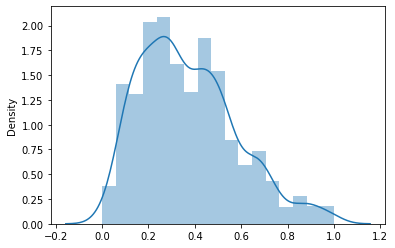

In [622]:
features_to_scale = ['enginesize', 'horsepower', 'carlength', 'carwidth', 'curbweight']
_cars_df  = cars_df[features_to_scale]
sns.distplot(_cars_df)

**After running `RFE` we selected the following features:**

In [604]:
selected_features = ['enginesize', 'horsepower', 'carwidth', 'curbweight', 'five','four', 'six', 'twelve', 'dohcv', 'ohcv']
X = cars_df[selected_features]
y = cars_df['price']

## Split the data into train and test datasets

In [382]:
from sklearn.model_selection import train_test_split

In [605]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 100)

In [606]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((143, 10), (62, 10), (143,), (62,))

## Choosing the right hyperparameters

We will apply polinomal transformation on the data, so we will have to try variuos of `degree` for the function.  
We will also tune the parameters of the Ridge regression, which are `alpha` and `solver`.

In [512]:
from sklearn.linear_model import Lasso, Ridge

We will find the best parameters for our dataset:

In [607]:
alphas = np.arange(0.1,1, 0.1)

In [608]:
solvers = ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg']

In [609]:
degrees = list(range(4, 10))

Looping over the solvers, alphas and degrees to get the accuracy of the model with those parameters:

In [610]:
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
import time
results = {"solver": [], 'alpha': [], 'degree': [], 'score': []}
counter = 1
total = len(solvers) * len(alphas) * len(degrees)
start = time.time()
for solver in solvers:
    for alpha in alphas:
        ridge = Ridge(alpha=alpha, solver=solver)
        for degree in degrees:
            in_start = time.time()
            # init polinom function
            poly = PolynomialFeatures(degree=degree)
            # apply function to data
            X_train_poly = poly.fit_transform(X_train)
            # init the ridge classifier and fit
            ridge.fit(X_train_poly, y_train)
            # apply polinom function to the data
            X_test_poly = poly.fit_transform(X_test)
            # predict the test data
            preds = ridge.predict(X_test_poly)
            acc = r2_score(y_test, preds)
            results['solver'].append(solver)
            results['alpha'].append(alpha)
            results['degree'].append(degree)
            results['score'].append(acc)
            in_end = time.time()
            print("{}/{} - solver, alpha, degree : {}, {}, {} - time: {} - acc: {}".format(counter, total, solver, alpha, degree, in_end-in_start, acc))
            counter+=1
print("Totla time took: {}".format(time.time() - start))

1/270 - solver, alpha, degree : auto, 0.1, 4 - time: 0.015316009521484375 - acc: 0.9326856461273069
2/270 - solver, alpha, degree : auto, 0.1, 5 - time: 0.01856398582458496 - acc: 0.9149552173819498
3/270 - solver, alpha, degree : auto, 0.1, 6 - time: 0.0333561897277832 - acc: 0.8671519927363196
4/270 - solver, alpha, degree : auto, 0.1, 7 - time: 0.0585780143737793 - acc: 0.8071967258706444
5/270 - solver, alpha, degree : auto, 0.1, 8 - time: 0.11595296859741211 - acc: 0.7570202505962703
6/270 - solver, alpha, degree : auto, 0.1, 9 - time: 0.23458623886108398 - acc: 0.726021281831323
7/270 - solver, alpha, degree : auto, 0.2, 4 - time: 0.02950906753540039 - acc: 0.9303771387639658
8/270 - solver, alpha, degree : auto, 0.2, 5 - time: 0.021908998489379883 - acc: 0.9323015614792445
9/270 - solver, alpha, degree : auto, 0.2, 6 - time: 0.0366671085357666 - acc: 0.921712537626167
10/270 - solver, alpha, degree : auto, 0.2, 7 - time: 0.06156611442565918 - acc: 0.8975669535875248
11/270 - sol

81/270 - solver, alpha, degree : svd, 0.5, 6 - time: 0.13453102111816406 - acc: 0.9310135259094348
82/270 - solver, alpha, degree : svd, 0.5, 7 - time: 0.4208040237426758 - acc: 0.9303016533945123
83/270 - solver, alpha, degree : svd, 0.5, 8 - time: 1.5071098804473877 - acc: 0.9248265343279877
84/270 - solver, alpha, degree : svd, 0.5, 9 - time: 3.9821503162384033 - acc: 0.915901961324617
85/270 - solver, alpha, degree : svd, 0.6, 4 - time: 0.05535292625427246 - acc: 0.9183322552412998
86/270 - solver, alpha, degree : svd, 0.6, 5 - time: 0.0702657699584961 - acc: 0.925368608829598
87/270 - solver, alpha, degree : svd, 0.6, 6 - time: 0.13335895538330078 - acc: 0.9297204272323332
88/270 - solver, alpha, degree : svd, 0.6, 7 - time: 0.4489579200744629 - acc: 0.9307857096515821
89/270 - solver, alpha, degree : svd, 0.6, 8 - time: 1.7898528575897217 - acc: 0.927992719461314
90/270 - solver, alpha, degree : svd, 0.6, 9 - time: 4.022507905960083 - acc: 0.9220168462321079
91/270 - solver, alph

161/270 - solver, alpha, degree : cholesky, 0.9, 8 - time: 0.11701560020446777 - acc: 0.9297284655842668
162/270 - solver, alpha, degree : cholesky, 0.9, 9 - time: 0.22787976264953613 - acc: 0.928435435885308
163/270 - solver, alpha, degree : lsqr, 0.1, 4 - time: 0.030082225799560547 - acc: 0.9340577702200096
164/270 - solver, alpha, degree : lsqr, 0.1, 5 - time: 0.017948150634765625 - acc: 0.9303713328567836
165/270 - solver, alpha, degree : lsqr, 0.1, 6 - time: 0.038847923278808594 - acc: 0.8762010564848454
166/270 - solver, alpha, degree : lsqr, 0.1, 7 - time: 0.0876011848449707 - acc: 0.8348105361308193
167/270 - solver, alpha, degree : lsqr, 0.1, 8 - time: 0.26186394691467285 - acc: 0.7954601254442053
168/270 - solver, alpha, degree : lsqr, 0.1, 9 - time: 0.5720260143280029 - acc: 0.7594069914303274
169/270 - solver, alpha, degree : lsqr, 0.2, 4 - time: 0.028097867965698242 - acc: 0.9301576130715421
170/270 - solver, alpha, degree : lsqr, 0.2, 5 - time: 0.017529964447021484 - acc:

239/270 - solver, alpha, degree : sparse_cg, 0.4, 8 - time: 0.3070218563079834 - acc: 0.9180935203870264
240/270 - solver, alpha, degree : sparse_cg, 0.4, 9 - time: 0.6861410140991211 - acc: 0.9045496342596389
241/270 - solver, alpha, degree : sparse_cg, 0.5, 4 - time: 0.027811050415039062 - acc: 0.9206707179808604
242/270 - solver, alpha, degree : sparse_cg, 0.5, 5 - time: 0.0162050724029541 - acc: 0.9274683791043576
243/270 - solver, alpha, degree : sparse_cg, 0.5, 6 - time: 0.02492213249206543 - acc: 0.9310670217819638
244/270 - solver, alpha, degree : sparse_cg, 0.5, 7 - time: 0.07975411415100098 - acc: 0.9302233893024927
245/270 - solver, alpha, degree : sparse_cg, 0.5, 8 - time: 0.29618191719055176 - acc: 0.924838592988555
246/270 - solver, alpha, degree : sparse_cg, 0.5, 9 - time: 0.6839678287506104 - acc: 0.9159577922940844
247/270 - solver, alpha, degree : sparse_cg, 0.6, 4 - time: 0.027841806411743164 - acc: 0.9183163876839954
248/270 - solver, alpha, degree : sparse_cg, 0.6,

## Results of search

Max scores for every solver:

In [611]:
df = pd.DataFrame(results)
max_scores = df.groupby("solver")['score'].apply(max)
max_scores

solver
auto         0.932686
cholesky     0.932686
lsqr         0.934829
sparse_cg    0.932642
svd          0.932686
Name: score, dtype: float64

Getting the `degree` and `alpha` parameters for the configuration of the Ridge regression model:

In [612]:
df[df['score'] == max_scores.max()]

,solver,alpha,degree,score
176,lsqr,0.3,6,0.934829


## Testing the new model with selected parameters

**Setting the parameters we found and train the model**

0.9348285111778308


/usr/local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


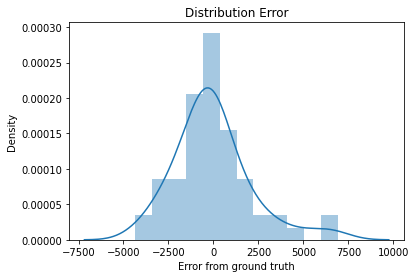

In [613]:
solver = 'lsqr'
degree = 6
alpha = 0.3
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
ridge = Ridge(solver=solver, alpha=alpha)
ridge.fit(X_train_poly, y_train)

X_test_poly = poly.fit_transform(X_test)
preds = ridge.predict(X_test_poly)
print(r2_score(y_test, preds))
sns.distplot(y_test - preds)
plt.title("Distribution Error")
plt.xlabel("Error from ground truth")
plt.show()

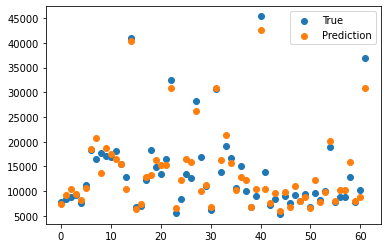

In [614]:
plt.scatter(range(len(y_test)), y_test, label="True")
plt.scatter(range(len(preds)), preds, label="Prediction")
plt.legend()
plt.show()